In [171]:
#Import libraries
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
import statsmodels.api as sm
from scipy import stats

# Context

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

### **Attribute Information**

1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]

In [172]:
#Read dataset
df = pd.read_csv('heart.csv')
print(df.shape)
df.head()

(918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Univariate Analysis


In [173]:
# import pandas_profiling
# from pandas_profiling import ProfileReport
# prof = ProfileReport(df)
# prof.to_file(output_file="report_prfile.html")


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

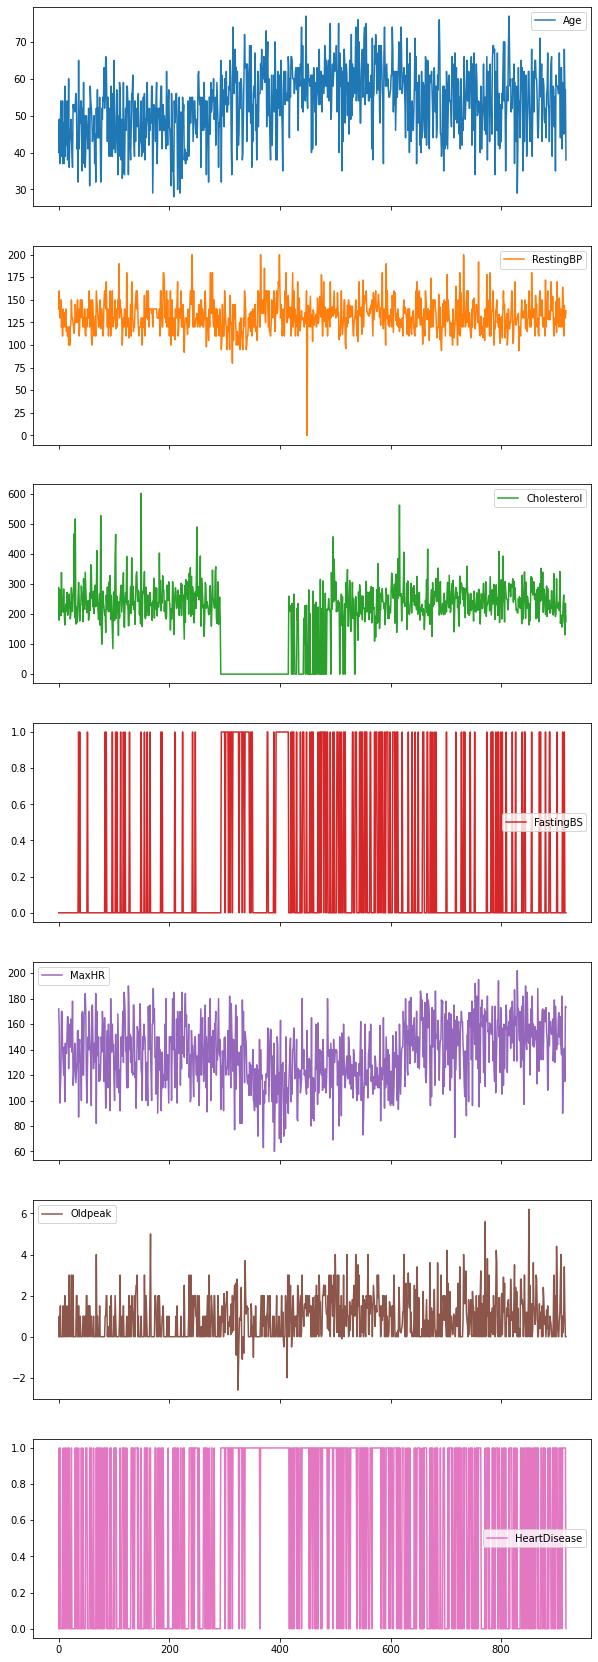

In [174]:
#Let's start  looking  the observations around the data frame

df.plot(subplots=True,figsize=(10, 30))


In [175]:
df.describe(include='all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


In [176]:
#Frequency table
tabla_frec = df['Sex'].value_counts()
tabla_frec

M    725
F    193
Name: Sex, dtype: int64

In [177]:
#Relative frequency table (works with percentages)
tabla_frec_rel = (df['Sex'].value_counts() / len(df['Sex']))*100
tabla_frec_rel

M    78.976035
F    21.023965
Name: Sex, dtype: float64

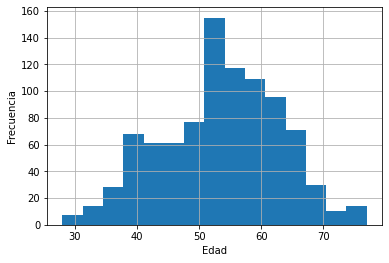

In [178]:
df['Age'].hist(bins=15)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

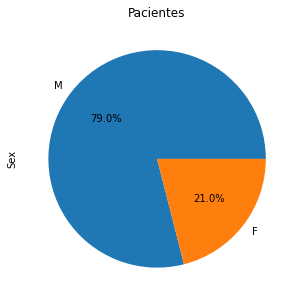

In [179]:
tabla_frec_rel.plot(kind='pie', title='Pacientes', autopct='%.1f%%', figsize=(5,5))
plt.show()

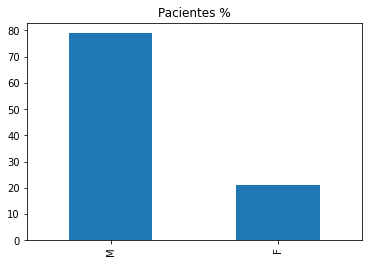

In [180]:
tabla_frec_rel.plot(kind ='bar', title='Pacientes %')
plt.show()

In [181]:
def kde_hist(df,xlabel,ylabel,title):
    fig,ax = plt.subplots(figsize=(16,8))

    df[xlabel].plot(kind='hist',density=True)
    df[xlabel].plot(kind='kde')

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title,size=20,pad=10)
    ax.set_xlim(25,80)

    quant25,quant50,quant75 = df[xlabel].quantile(0.25),df[xlabel].quantile(0.5),df[xlabel].quantile(0.75)
    quants = [[quant25,0.8,0.2],[quant50,0.95,0.4],[quant75,0.8,0.6]]
    for i in quants:
        plt.axvline(x=i[0],alpha=i[1],ymax=i[2],linestyle=':',color='black')

    ax.text(quant25, 0.012, "25th", size = 22, alpha = 0.85)
    ax.text(quant50, 0.025, "50th", size = 25, alpha = 1)
    ax.text(quant75, 0.035, "75th", size = 22, alpha = 0.85)

    ax.grid(False)
    plt.show()

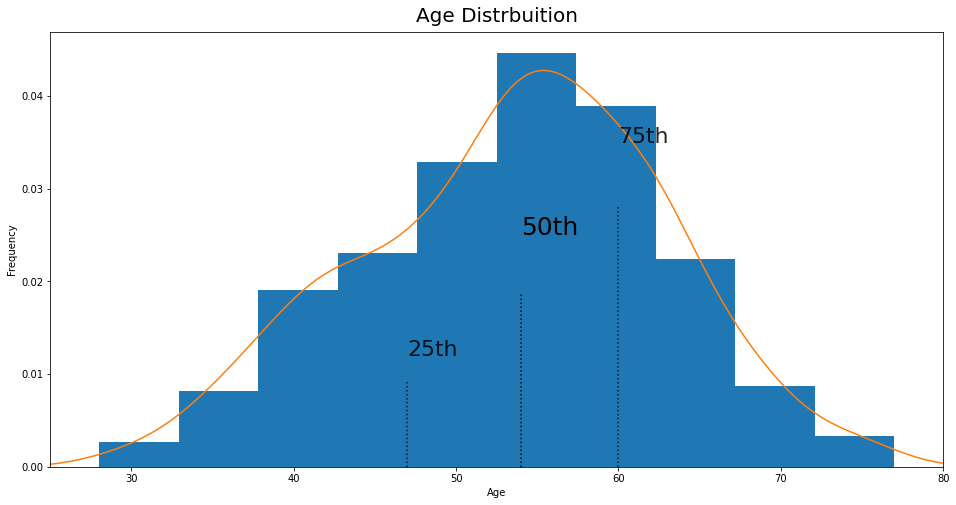

In [182]:
kde_hist(df,'Age','Frequency','Age Distrbuition')

In [183]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RestingBP'}>,
        <AxesSubplot:title={'center':'Cholesterol'}>],
       [<AxesSubplot:title={'center':'FastingBS'}>,
        <AxesSubplot:title={'center':'MaxHR'}>,
        <AxesSubplot:title={'center':'Oldpeak'}>],
       [<AxesSubplot:title={'center':'HeartDisease'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

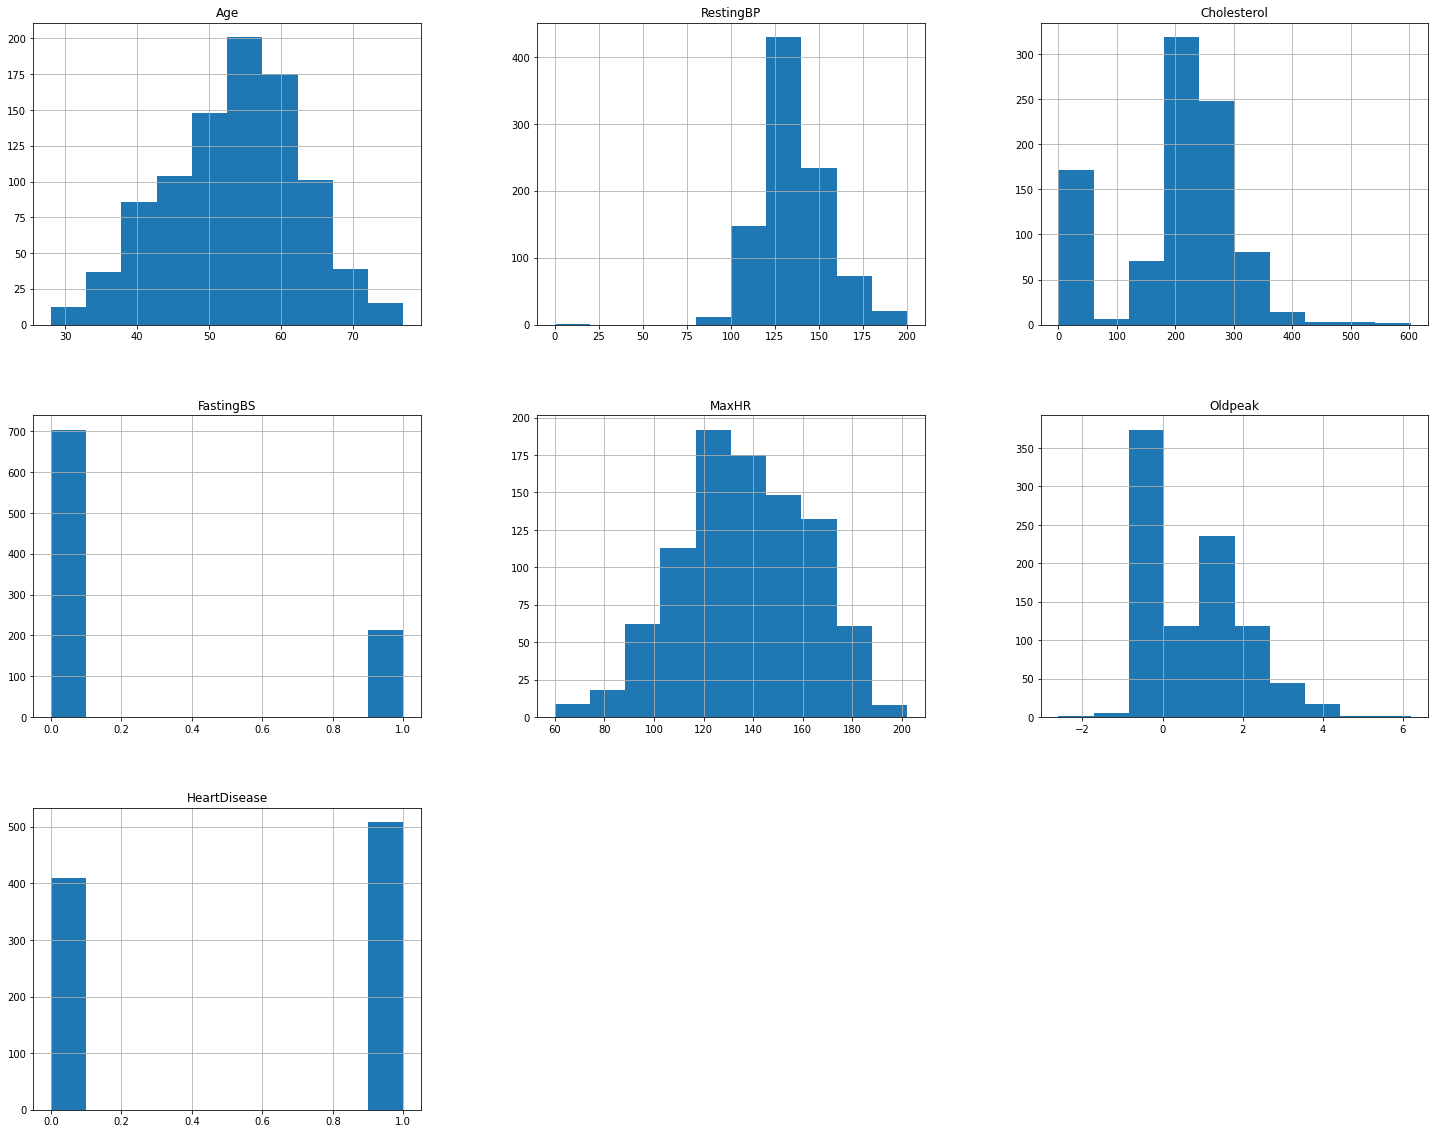

In [184]:
#Distribution Hist
# The most of features looks with a normal distribution, the most of observations are arround to the mean
df.hist(bins=10, figsize=(25, 20))

# Correlation Analysis
In this section we going to compare the combination of correlations of all variables, looking for a pattern that allows prove our hypotesis

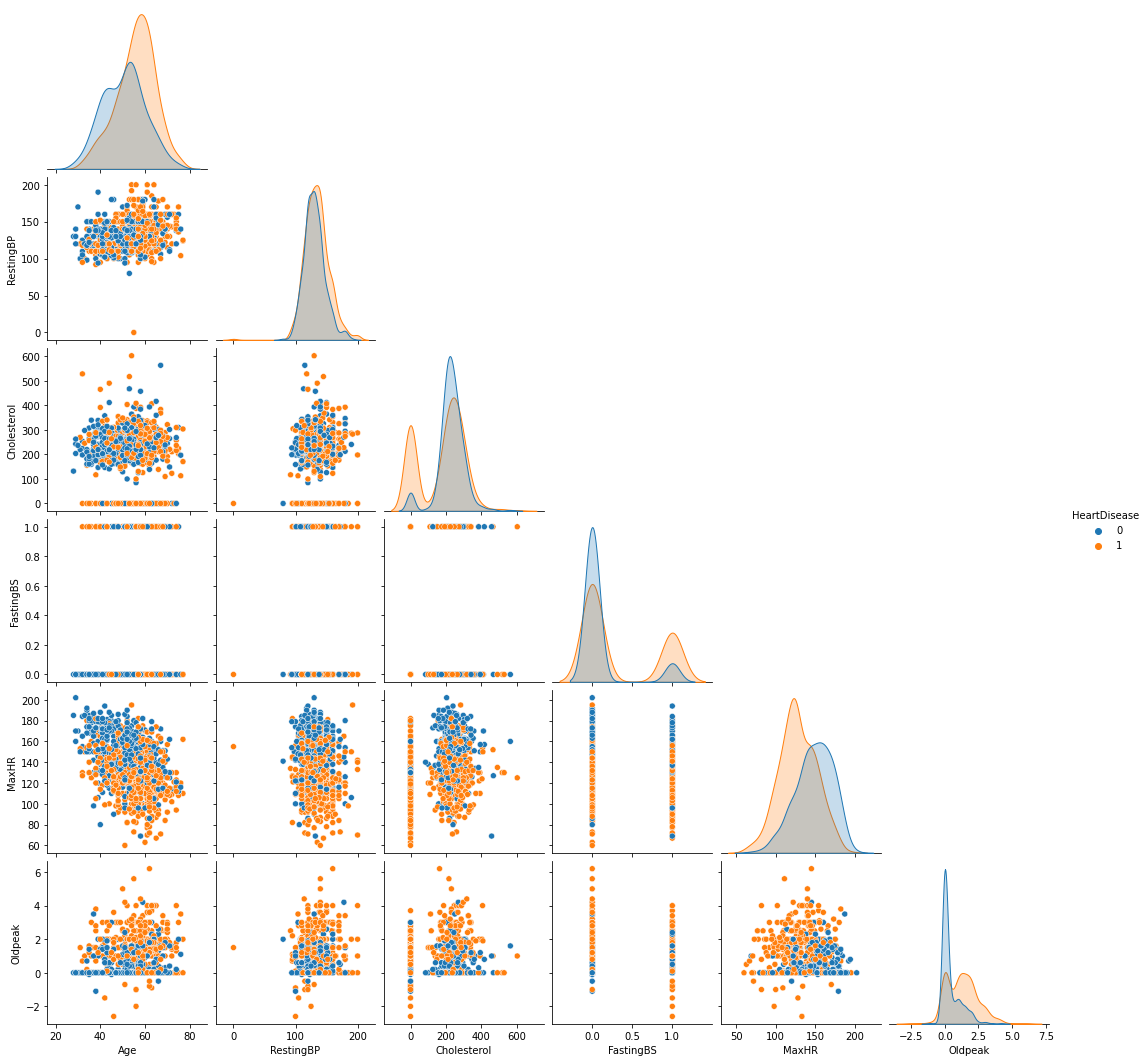

In [185]:
#pairwise bivariate distributions on a data set, you can use the function
sns.pairplot(df,hue='HeartDisease' , corner = True)
plt.show()

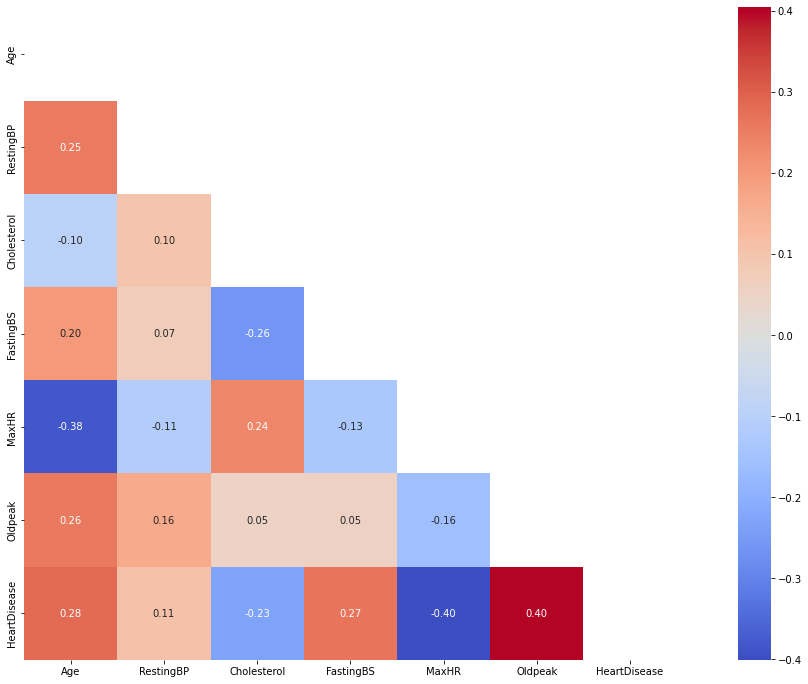

In [186]:
matrix = df.corr()
mask = np.triu(np.ones_like(matrix,dtype='bool'))

plt.figure(figsize=(22,12))
sns.heatmap(matrix,mask=mask,annot=True,center=0,fmt='.2f',square=True,cmap="coolwarm")
plt.show()

# Encode features

In [187]:
# LabelEncoder hep us to encode the categorical variables, the porpouse is has all features with numbers
df_encode = df.apply(LabelEncoder().fit_transform)
df_encode.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,98,0,10,2,0
1,21,0,2,55,40,0,1,82,0,20,1,1
2,9,1,1,31,141,0,2,25,0,10,2,0
3,20,0,0,39,72,0,1,34,1,25,1,1
4,26,1,2,49,53,0,1,48,0,10,2,0


### Preparation for model,
In this section we going to choose our variable of answer, and prepare the data for test diferent models of clasification. 

In [188]:
# First lets split our features, we need to define X and Y (Anser variable HeartDisease) 

In [189]:
# X all columns of dataframe except the last one the class variable (HeartDisease)
X = df_encode.iloc[:,:-1]

# Also we can normalice x features to test if they  fit better
# np.log1p apply logarithmic normalization to each variable en the dataframe
# Log 1 + x
X_norm = np.log1p(df_encode.iloc[:,:-1])

# Y The last Column (HeartDisease)
y = df_encode['HeartDisease']

In [190]:
print("X-> ",X.head().shape,"X-> ",X_norm.head().shape,"Y-> ",y.head().shape)


X->  (5, 11) X->  (5, 11) Y->  (5,)


In [191]:
# It is important to know if the amount of response is balanced
zeros = y[y==0].count()
ones = y[y==1].count()
zeros,ones


(410, 508)

c:\users\cristian.correa\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Class variable Balance'}, xlabel='HeartDisease', ylabel='count'>

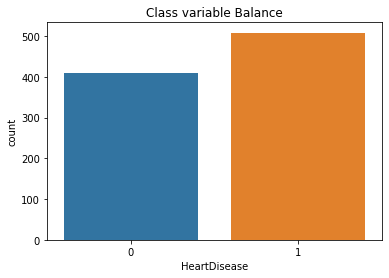

In [192]:
# Note that the height of both classes is similar, the set seems balanced
plt.title('Class variable Balance')
sns.countplot(y)

In [193]:
#Let's split the training set and the validation set
"""A group for training, which has the purpose of finding out
if that person has the disease or not.."""

from sklearn.model_selection import train_test_split


In [194]:
#test_size with 30% of sample, random_state=1 to preserve the random events 
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=1)

In [195]:
X_train.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
528,3.091042,0.693147,1.098612,3.496508,2.639057,0.0,0.693147,3.988984,0.693147,3.258097,0.693147
704,3.135494,0.693147,0.000000,3.912023,4.624973,0.0,0.000000,4.007333,0.000000,3.610918,0.693147


In [196]:
X_test.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
900,3.433987,0.693147,0.0,2.890372,5.153292,0.0,1.098612,4.204693,0.000000,3.912023,0.0
570,3.367296,0.693147,0.0,3.401197,4.406719,0.0,1.098612,3.828641,0.693147,3.433987,0.0


# Building our classified
Given the nature of the dataset and the problem, we use two classification algorithms to evaluate different scenarios.

## DecisionTreeClassifier

In [197]:
#Lets start with a decision tree
from sklearn.tree import DecisionTreeClassifier

In [198]:
model = DecisionTreeClassifier(random_state=1)

In [199]:
#now let's train From the X_train training data, it will evaluate according to the response variable
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [200]:
y_prds = model.predict(X_test)

In [201]:
# Comparison of the model output, with the test data
benchmark = pd.DataFrame({'Real': y_test, 'preds': y_prds})
benchmark.head(10)

,Real,preds
900,1,1
570,1,0
791,1,1
189,1,1
372,1,0
191,0,0
643,1,0
474,0,1
65,0,0
890,0,1


In [202]:
from sklearn.metrics import accuracy_score

In [203]:
# The model has been successful in 77% of the cases :(
acc = accuracy_score(y_test,y_prds)
acc

0.7644927536231884

In [204]:
# Other way to measure the  accurracy is with a confusion matrix
""" 92 cases were zeros, 118 ones
"""
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_prds)
cm

array([[ 90,  19],
       [ 46, 121]], dtype=int64)

In [205]:
# Lets import GridSearch to test differents parameters for dessision tree
from sklearn.model_selection import GridSearchCV

In [206]:
"""We are going to vary the parameters of the tree to find the best combination of these
and check if it is possible to improve the acurracy"""

params = [{'max_depth':[None,3,4,5],
           'max_features':[0.9,1],
           'min_samples_split':[0.7,0.8,0.95]}]

In [207]:
gs = GridSearchCV(cv=5, scoring='accuracy',estimator=DecisionTreeClassifier(),
                  n_jobs=-1, param_grid=params)

In [208]:
#Lets train again with these combinations
gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid=[{'max_depth': [None, 3, 4, 5],
                          'max_features': [0.9, 1],
                          'min_samples_split': [0.7, 0.8, 0.95]}],
             scoring='accuracy')

In [209]:
# Find the best combination
gs.best_estimator_

DecisionTreeClassifier(max_features=0.9, min_samples_split=0.8)

In [210]:
gs.best_params_

{'max_depth': None, 'max_features': 0.9, 'min_samples_split': 0.8}

In [211]:
# Save opuput in y_prds_gs
y_prds_gs = gs.best_estimator_.predict(X_test)

In [212]:
y_prds_gs

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0], dtype=int64)

In [213]:
#Compare again with the best estimator
benchmark = pd.DataFrame({'Real': y_test, 'preds': y_prds_gs})
benchmark.head(10)

,Real,preds
900,1,1
570,1,1
791,1,1
189,1,1
372,1,0
191,0,0
643,1,1
474,0,0
65,0,0
890,0,1


In [214]:
#The accuracy has improved al 83%
decision_tree_score = accuracy_score(y_test,y_prds_gs)
decision_tree_score

0.8297101449275363

In [215]:
# dtree = model.fit(xtree_train,ytree_train)
import graphviz
from sklearn.tree import export_graphviz


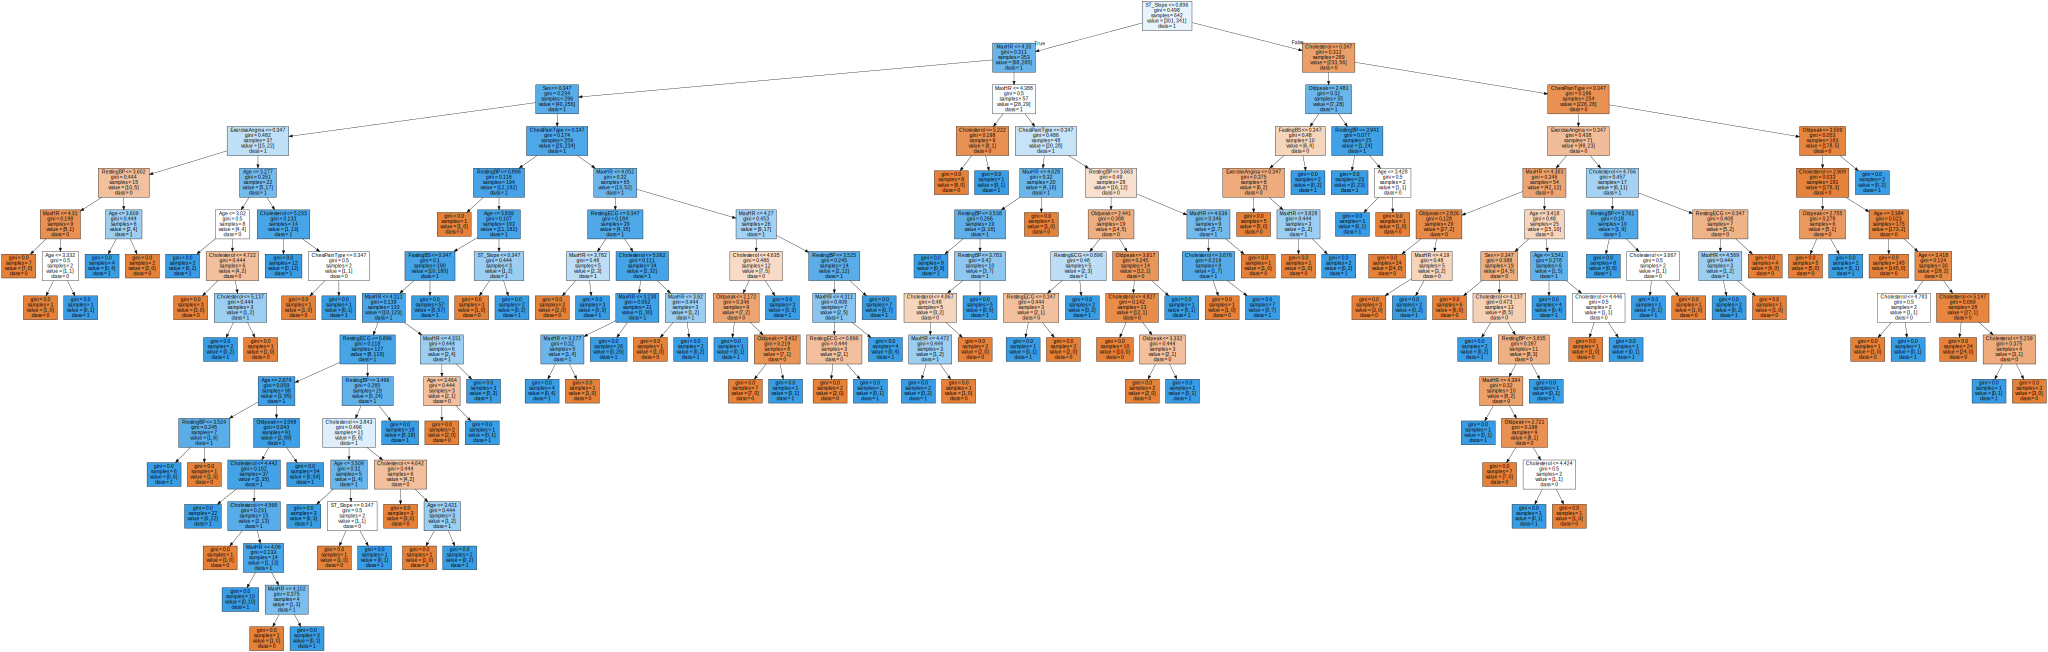

In [216]:
dtree = dtree = model.fit(X_train,y_train)
dot_data = export_graphviz(dtree,feature_names=X_train.columns,
                           class_names=['0','1'],filled=True,out_file=None)
graph = graphviz.Source(dot_data,format='png')
graph

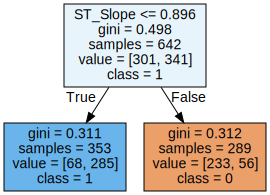

In [217]:

# Best Estimator
# DecisionTreeClassifier(max_features=0.9, min_samples_split=0.8)
dtree = gs.best_estimator_
dot_data = export_graphviz(dtree,feature_names=X_train.columns,
                           class_names=['0','1'],filled=True,out_file=None)
graph = graphviz.Source(dot_data,format='png')
graph

### This case could be a case of overfitting, common sense tells us that it could be a random chance finding a better fit with a depth tree of 1, with only one Feature

# Random Forest
This algorithm basicaly consists of creating N trees randomly and comparing those results to give a definitive result.

In [218]:
from sklearn.ensemble import RandomForestClassifier

In [219]:
# n_estimators is the number of random trees
rf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=1)

In [220]:
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=1)

In [221]:
y_prds_rf = rf.predict(X_test)

In [222]:
y_prds_rf

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0], dtype=int64)

In [223]:
# With random forest we have 88% of success
"""The accuracy has improved, this may be because in the 500 trees that he has randomly created,
he has been able to find certain patterns of the solution of these trees to improve the result.
"""
random_forest_score = accuracy_score(y_test,y_prds_rf)
random_forest_score

0.8731884057971014

In [224]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_prds_rf)

array([[ 95,  14],
       [ 21, 146]], dtype=int64)

# Logistic Regresion

In [225]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

c:\users\cristian.correa\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


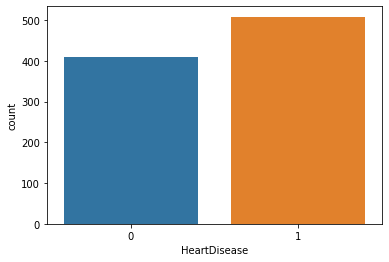

In [226]:
#Balance of classes
sns.countplot(df['HeartDisease'])
plt.show()

In [227]:
#Features selected according the k best function with best  p-value
X = df_encode[['ST_Slope','ChestPainType']]
y = df_encode['HeartDisease']
print(X.shape)
print(y.shape)

(918, 2)
(918,)


### Under - Over sampling - SMOTEENN (Sythetic Minority Oversampling Technique Edited Nearest Neighbours)

In [228]:
y.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [229]:
from imblearn.combine import SMOTEENN
from collections import Counter
smote_enn = SMOTEENN(random_state=0)
f,g = smote_enn.fit_resample(X,y)

X_smotenn, y_smotenn = smote_enn.fit_resample(X,y)


print('Size of X before applying the SMOTEENN:', X.shape)
print('Size of X after applying the SMOTEENN:', X_smotenn.shape)
print('Lets see the balance of classes: \n', y_smotenn.value_counts())
print('Our classes are less unbalanced')

Size of X before applying the SMOTEENN: (918, 2)
Size of X after applying the SMOTEENN: (732, 2)
Lets see the balance of classes: 
 0    386
1    346
Name: HeartDisease, dtype: int64
Our classes are less unbalanced


In [230]:
# We separate the data in training and test
#The 0.2 refers to the test being 20%
#The random state is a random seed, always put 0 for practicality, although I can put any number
#Stratify guarantees that the proportion of classes is maintained, in this case it maintains the imbalance.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

#Look at the size of the data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((642, 2), (276, 2), (642,), (276,))

In [231]:
pd.value_counts(y_train)

1    355
0    287
Name: HeartDisease, dtype: int64

In [232]:
# define  model
modelo1 = LogisticRegression(random_state=0, class_weight='balanced')

#Train  model
modelo1.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=0)

In [233]:
#Let's do predictions
y_pred1 = modelo1.predict(X_test)
print(y_pred1[0:5])
y_test.head()

[1 1 0 0 1]


403    1
373    1
147    0
723    1
568    1
Name: HeartDisease, dtype: int64

In [234]:
#Getting probabilities
y_pred_proba = modelo1.predict_proba(X_test)
y_pred_proba[0:5]

array([[0.17552258, 0.82447742],
       [0.17552258, 0.82447742],
       [0.81734042, 0.18265958],
       [0.64893728, 0.35106272],
       [0.02393154, 0.97606846]])

In [235]:
# evaluating the model
Accuracy_train = modelo1.score(X_train,y_train)
print('Accuracy train =', Accuracy_train)
Accuracy_test = modelo1.score(X_test, y_test)
print('Accuracy test =', Accuracy_test)
print('Diferencia = ', np.abs(Accuracy_train-Accuracy_test))

Accuracy train = 0.7741433021806854
Accuracy test = 0.7681159420289855
Diferencia =  0.006027360151699912


In [236]:
#Let's evaluate with the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred1)

#0 = You do not have heart disease
#1 = You do have heart disease

array([[112,  11],
       [ 53, 100]], dtype=int64)

In [237]:
from sklearn.metrics import classification_report

names = ['He has no disease','He does have heart disease']
print(classification_report(y_test,y_pred1, target_names=names))

                            precision    recall  f1-score   support

         He has no disease       0.68      0.91      0.78       123
He does have heart disease       0.90      0.65      0.76       153

                  accuracy                           0.77       276
                 macro avg       0.79      0.78      0.77       276
              weighted avg       0.80      0.77      0.77       276



In [238]:
#The most important metric of all, because it measures the performance of the model when there is a class imbalance.
from imblearn.metrics import geometric_mean_score

logistic_regretion_score = geometric_mean_score(y_test, y_pred1)
logistic_regretion_score

0.7714552523212375

c:\users\cristian.correa\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


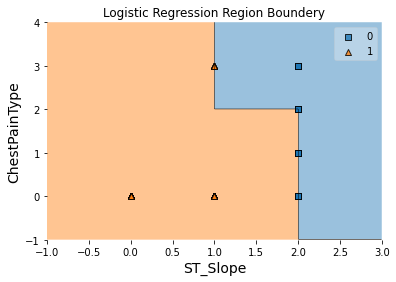

In [239]:
#Decision Region
from mlxtend.plotting import plot_decision_regions

X_p = np.array(X_smotenn) # convert them to vectors
y_p = np.array(y_smotenn)

plot_decision_regions(X_p, y_p, clf=modelo1, legend=1)
plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('Logistic Regression Region Boundery')
plt.show()

In [240]:
# random_forest_score
decision_tree_score
# logistic_regretion_score

0.8297101449275363

In [241]:
#let's compare the classification methods

benchmark = pd.DataFrame({'RF': [random_forest_score], 'DTree': [decision_tree_score],'LR': [logistic_regretion_score]})
benchmark

,RF,DTree,LR
0,0.873188,0.82971,0.771455
